## Exercise One ML
## Arshia Yousefi Nezhad
## 610203085

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('train.csv')
train_df.head()

,x1,x2,labels
0,-1.872262,-0.999991,1.0
1,-1.047198,0.500973,0.0
2,0.031733,-0.286129,1.0
3,1.745329,2.482572,0.0
4,2.887727,2.294539,0.0


In [3]:
test_df = pd.read_csv('test.csv')
test_df.head()

,x1,x2
0,1.491463,0.961469
1,0.475999,0.982520
2,-1.301064,0.899631
3,1.618396,2.482466
4,-0.285599,1.402946


In [81]:
# we have 150 training data, and for this reason that we take 50 test data, we set test_size in below code to 20%
train, validation = train_test_split(train_df, test_size=0.33, random_state=42)
validation.head()

,x1,x2,labels
73,2.633861,2.183641,0.0
18,-3.078126,1.424294,0.0
118,0.983731,2.048528,0.0
78,-1.554930,-0.878871,1.0
76,-2.316528,-0.989079,1.0


In [50]:
class classification_algorithms:
    def __init__(self, train, validation):
        self.X_train = train[["x1", "x2"]]
        self.y_train = train["labels"]
        self.X_val = validation[["x1", "x2"]]
        self.y_val = validation["labels"]

    # Quesion 2 -----------------------------
    def normalized_data(self, data):
        # Normalize using Min/Max Normalization.
        data_X = data[["x1", "x2"]]
        normalized_data=(data_X-data_X.mean())/data_X.std()
        return normalized_data
    # Quesion 4 part 1 --------------------------------
    def train_perceptron_model(self, max_iter, X_train, X_val):
        X_train_normalized = self.normalized_data(X_train)
        X_val_normalized = self.normalized_data(X_val)
        # Some preprocess on train data -----------
        X_train_normalized = X_train_normalized.to_numpy()
        y_train = np.array(self.y_train)
        # Some perprocess on validation data ---------
        X_val_normalized = X_val_normalized.to_numpy()
        y_val = np.array(self.y_val)
        # make perceptron model
        clf = Perceptron(max_iter=max_iter, random_state=42)
        clf.fit(X_train_normalized, y_train)
        
        print("Score in Train data: ", clf.score(X_train_normalized, y_train))
        print("Score in val data: ", clf.score(X_val_normalized, y_val))
        return clf

    # Quesion 3 ----------------------------
    def plot_data(self, validation=False):
        if validation == True:
            sns.scatterplot(x=self.X_val["x1"], y=self.X_val["x2"], hue=self.y_val)
        else:
            sns.scatterplot(x=self.X_train["x1"], y=self.X_train["x2"], hue=self.y_train)
    # Quesion 4 part 2 ----------------------------
    def decision_boundary(self, model, X, y):
        X_normalized = self.normalized_data(X).to_numpy()
        y = np.array(y)
        # Retrieve the model parameters.
        b = model.intercept_[0]
        w1, w2 = model.coef_.T
        # Calculate the intercept and gradient of the decision boundary.
        c = -b/w2
        m = -w1/w2

        # Plot the data and the classification with the decision boundary.
        xmin, xmax = -2, 2
        ymin, ymax = -2, 2
        xd = np.array([xmin, xmax])
        yd = m*xd + c
        plt.plot(xd, yd)
        plt.plot(xd, yd, 'k', lw=1, ls='--')
        plt.fill_between(xd, yd, ymin, color='blue', alpha=0.2)
        plt.fill_between(xd, yd, ymax, color='red', alpha=0.2)

        plt.scatter(*X_normalized[y==0].T, s=8, alpha=0.5)
        plt.scatter(*X_normalized[y==1].T, s=8, alpha=0.5)
        plt.xlim(xmin, xmax)
        plt.ylim(ymin, ymax)
        plt.title('Perceptron Desicion Bondaries')
        plt.ylabel('x1')
        plt.xlabel('x2')

    # Quesion 5 part 1 --------------------
    def poly_features(self,model, X_train, y_train,X_val, y_val ,d):
        poly_features = PolynomialFeatures(degree=d, include_bias=False)
        X_poly = poly_features.fit_transform(X_train)
        val_poly = poly_features.transform(X_val)
        model.fit(X_poly, y_train)
        print("="*5 + "degree {degree}".format(degree=d)+ "="*10)
        print("Score in Train data in degrees {degree}: ".format(degree=d), model.score(X_poly, train_y))
        X_val = normalized_val_X.to_numpy()
        y_val = np.array(val_Y.labels)
        print("Score in Validation data in degrees {degree}: ".format(degree=d), model.score(val_poly, y_val))
        return X_poly, val_poly, model
  
    # Quesion 5 part 2 --------------------------------
    def plot_miss_classification(self, model, X_poly, y_train, val_poly, y_val):
        miss_class_train = np.where(y_train != model.predict(X_poly))
        miss_class_val = np.where(y_val != model.predict(val_poly))
        
        fig, axes = plt.subplots(1, 2, figsize=(12, 6))
        
        # Plot for training data
        axes[0].scatter(X_poly[:, 0], X_poly[:, 1], c=y_train, cmap='viridis', edgecolors='k', s=20)
        axes[0].scatter(X_poly[miss_class_train, 0], X_poly[miss_class_train, 1], color='red', edgecolors='k', s=20, label='Wrong train prediction')
        axes[0].set_title("Training Data")
        axes[0].set_xlabel("x1")
        axes[0].set_ylabel("x2")
        
        # Plot for validation data
        axes[1].scatter(val_poly[:, 0], val_poly[:, 1], c=y_val, cmap='viridis', edgecolors='k', s=20, marker='D')
        axes[1].scatter(val_poly[miss_class_val, 0], val_poly[miss_class_val, 1], color='red', edgecolors='k', s=20, label='Wrong validation prediction')
        axes[1].set_title("Validation Data")
        axes[1].set_xlabel("x1")
        axes[1].set_ylabel("x2")
        
        plt.suptitle("Miss Classified Plots")
        plt.tight_layout()
        plt.show()

    # Quesion 6 part 1 --------------------------------
    def prediction(self, model, X_train, y_train, X_val, y_val, d):
        X_poly, val_poly, model = self.poly_features(model, X_train, y_train,X_val, y_val ,d)
    
        

In [51]:
alg = classification_algorithms(train, validation)
# trained_model = alg.train_perceptron_model(1)

In [52]:
X_train_data = alg.X_train
Y_train_data = alg.y_train

X_val_data = alg.X_val
Y_val_data = alg.y_val

normalized_train = alg.normalized_data(X_train_data)
normalized_val = alg.normalized_data(X_val_data)

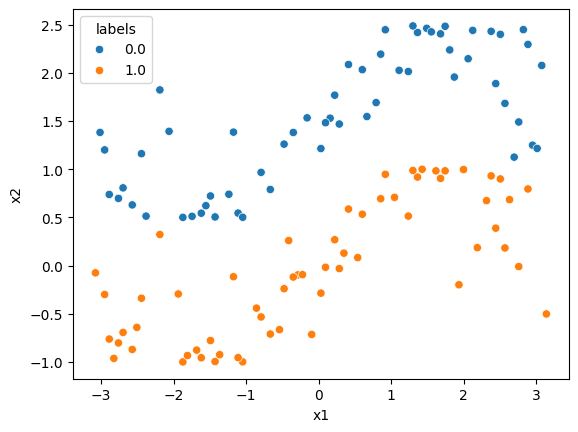

In [53]:
# scatter plot on training data
alg.plot_data()

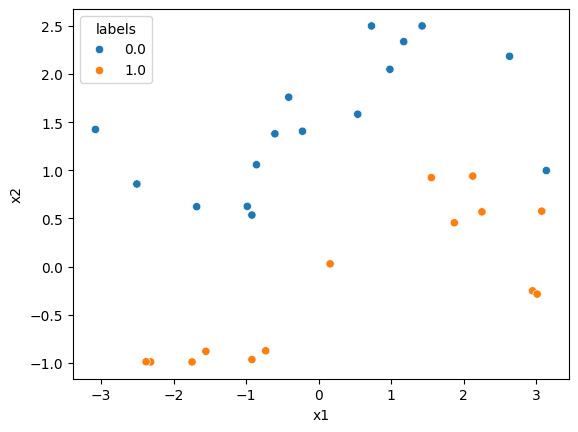

In [54]:
# scatter plot on validation data
alg.plot_data(validation=True)

In [55]:
perceptron_model = alg.train_perceptron_model(100, X_train_data, X_val_data)

Score in Train data:  0.9333333333333333
Score in val data:  0.9666666666666667


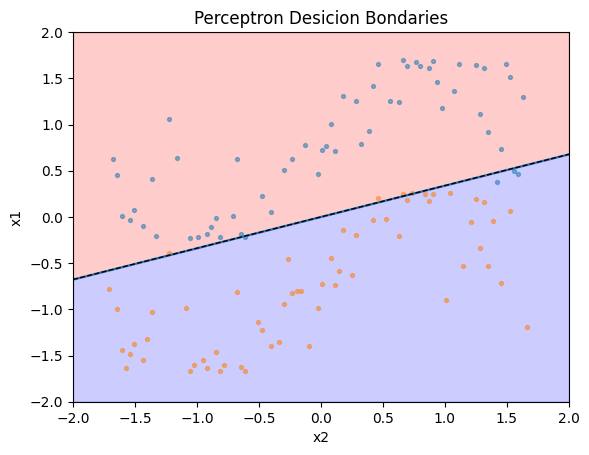

In [56]:
alg.decision_boundary(perceptron_model, X_train_data, Y_train_data)

Degree 2 ===============
=====degree 2==========
Score in Train data in degrees 2:  0.9583333333333334
Score in Validation data in degrees 2:  0.9666666666666667


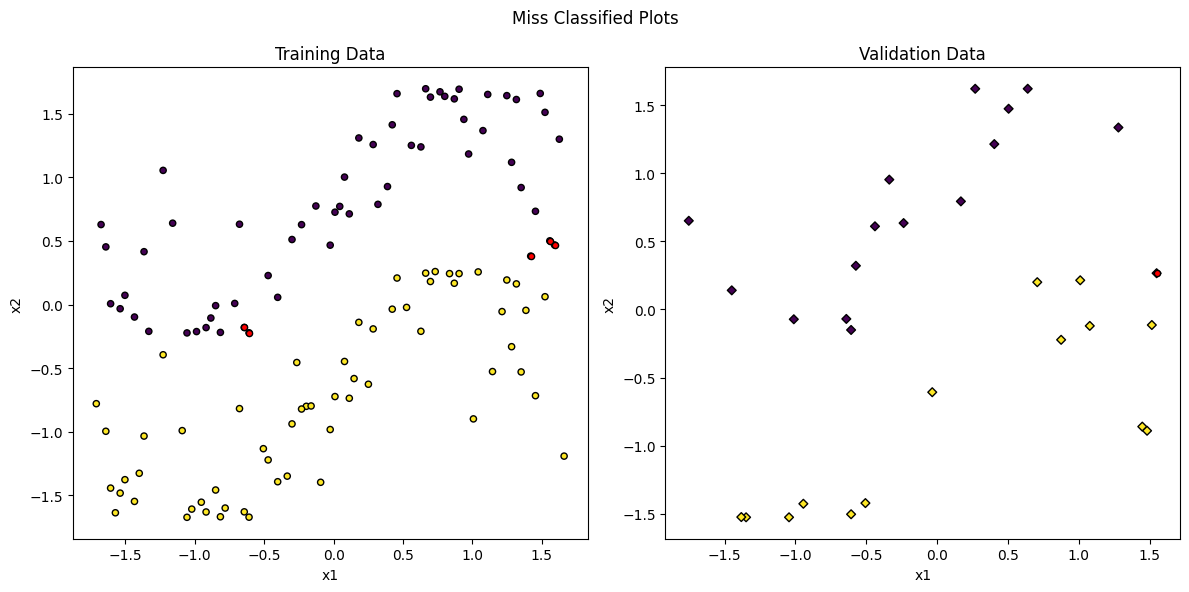

In [63]:
print("Degree 2 ===============")
X_poly, val_poly, model = alg.poly_features(perceptron_model, normalized_train, Y_train_data, normalized_val, Y_val_data, d=2)
alg.plot_miss_classification(model, X_poly, Y_train_data, val_poly, Y_val_data)


Degree 3 ===============
=====degree 3==========
Score in Train data in degrees 3:  1.0
Score in Validation data in degrees 3:  1.0


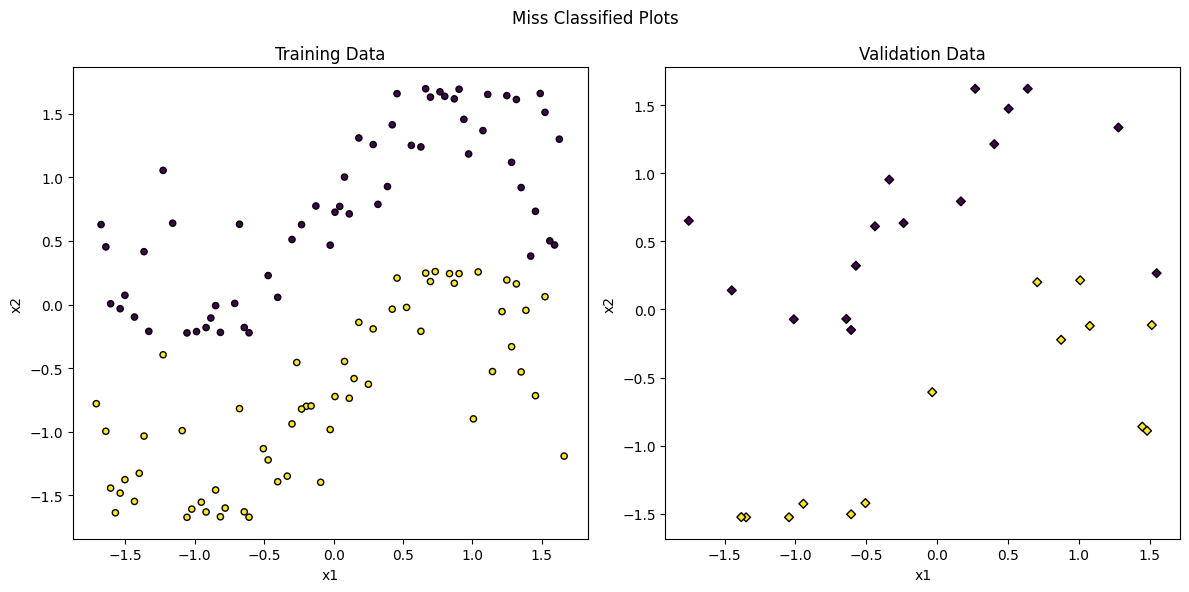

In [64]:
print("Degree 3 ===============")
X_poly, val_poly, model = alg.poly_features(perceptron_model, normalized_train, Y_train_data, normalized_val, Y_val_data, d=3)
alg.plot_miss_classification(model, X_poly, Y_train_data, val_poly, Y_val_data)


Degree 5 ===============
=====degree 5==========
Score in Train data in degrees 5:  1.0
Score in Validation data in degrees 5:  0.9666666666666667


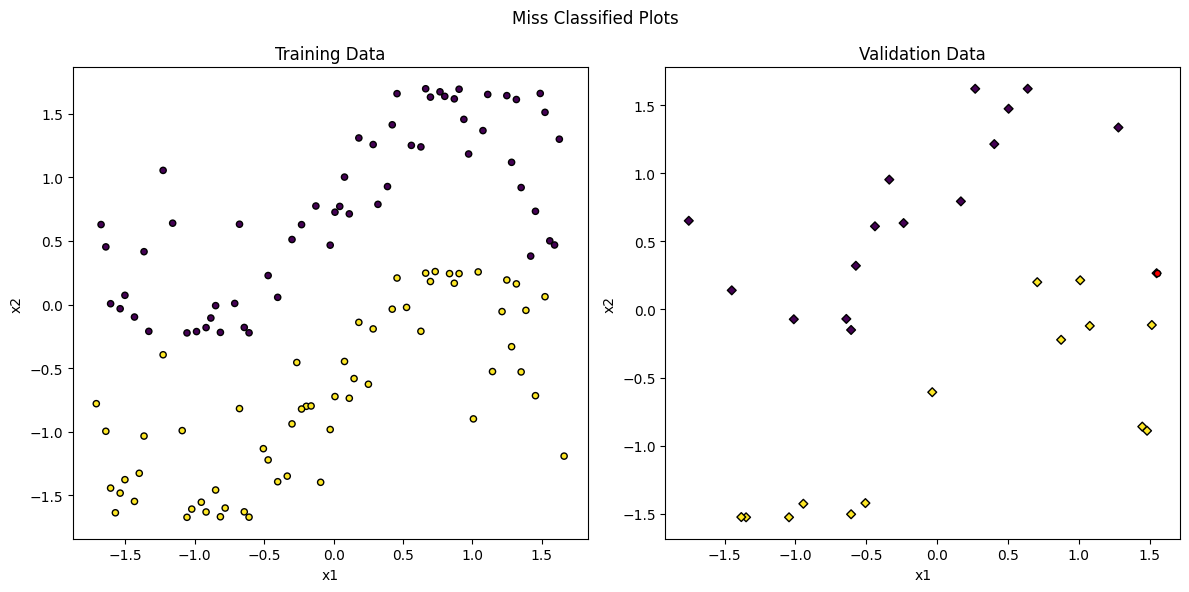

In [65]:
print("Degree 5 ===============")
X_poly, val_poly, model = alg.poly_features(perceptron_model, normalized_train, Y_train_data, normalized_val, Y_val_data, d=5)
alg.plot_miss_classification(model, X_poly, Y_train_data, val_poly, Y_val_data)


Degree 10 ===============
=====degree 10==========
Score in Train data in degrees 10:  1.0
Score in Validation data in degrees 10:  0.9666666666666667


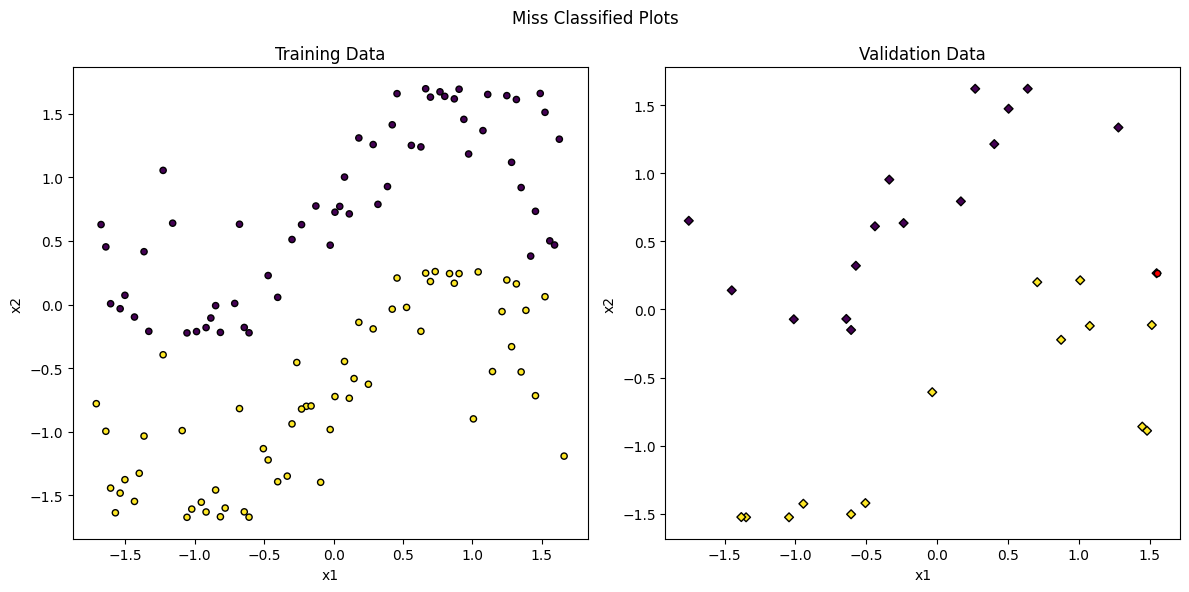

In [66]:
print("Degree 10 ===============")
X_poly, val_poly, model = alg.poly_features(perceptron_model, normalized_train, Y_train_data, normalized_val, Y_val_data, d=10)
alg.plot_miss_classification(model, X_poly, Y_train_data, val_poly, Y_val_data)


In [67]:
# Quesion 6 part 1 ----------
degrees = [2, 3, 5, 10]
list_models = []
for d in degrees:
    X_poly, val_poly, model = alg.poly_features(perceptron_model, normalized_train, Y_train_data, normalized_val, Y_val_data, d=d)


=====degree 2==========
Score in Train data in degrees 2:  0.9583333333333334
Score in Validation data in degrees 2:  0.9666666666666667
=====degree 3==========
Score in Train data in degrees 3:  1.0
Score in Validation data in degrees 3:  1.0
=====degree 5==========
Score in Train data in degrees 5:  1.0
Score in Validation data in degrees 5:  0.9666666666666667
=====degree 10==========
Score in Train data in degrees 10:  1.0
Score in Validation data in degrees 10:  0.9666666666666667


In [68]:
# Quesion 6 part 2 -----------------
normalized_test = alg.normalized_data(test_df)
X_poly, val_poly, model = alg.poly_features(perceptron_model, normalized_train, Y_train_data, normalized_val, Y_val_data, d=3)

=====degree 3==========
Score in Train data in degrees 3:  1.0
Score in Validation data in degrees 3:  1.0


In [83]:
# Quesion 6 -----------------------------
# trainning model on 2-D ploynomial Features
normalized_test = alg.normalized_data(test_df)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(normalized_train)
val_poly = poly_features.transform(normalized_val)
model.fit(X_poly, Y_train_data)

# prediction test data
test_poly = poly_features.transform(normalized_test)
list_predicted = model.predict(test_poly).astype('int32')
df_preds = pd.DataFrame(list_predicted, columns=["labels"])

# Save to CSV file
pd.Series(list_predicted, name='labels').to_csv("preds.csv", index=False)